## Linear Regression Lecture Notes from JosePortilla_UDEMY - Henric Jandoc

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use(['science', 'notebook','grid','no-latex'])

## Coding Simple Linear Regression

In [3]:
df = pd.read_csv('C:\\Users\\henri\\Documents\\Python and Machine Learning\\UNZIP_FOR_NOTEBOOKS_FINAL\\08-Linear-Regression-Models\\Advertising.csv')

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

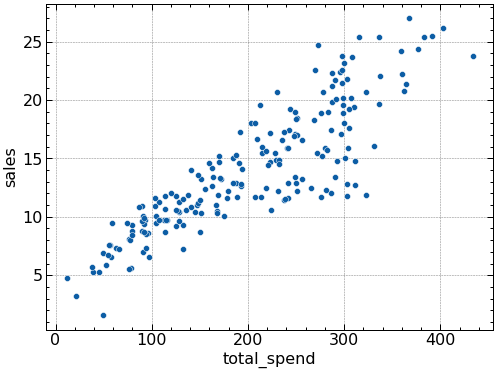

In [7]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

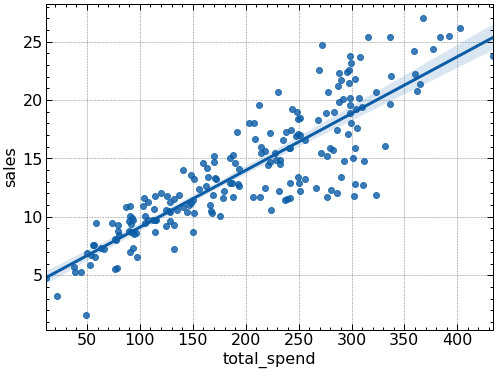

In [8]:
sns.regplot(data = df, x = 'total_spend', y = 'sales')

In [9]:
X = df['total_spend']
y = df['sales']

In [10]:
# help(np.polyfit)

In [11]:
np.polyfit(X,y, deg = 1)  # beta one and beta nought

array([0.04868788, 4.24302822])

In [12]:
potential_spend = np.linspace(0,500,100)  # x

In [13]:
predicted_sales = 0.04868788*potential_spend + 4.24302822   # y = B1*x + B0

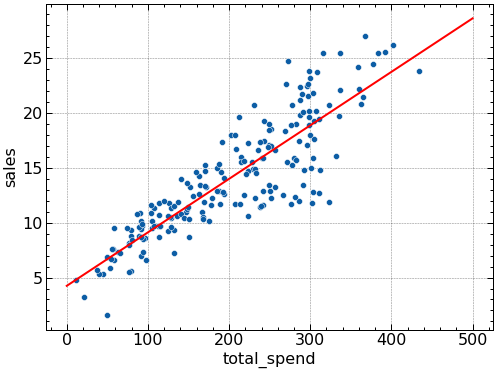

In [14]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(potential_spend, predicted_sales, color = 'red')

In [15]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822

In [16]:
predicted_sales

13.98060422

In [17]:
np.polyfit(X, y, deg = 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
# y = B3*x**3 + B2*x**2 + B1*x + B0

In [19]:
pot_spend = np.linspace(0,500,100)

In [20]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

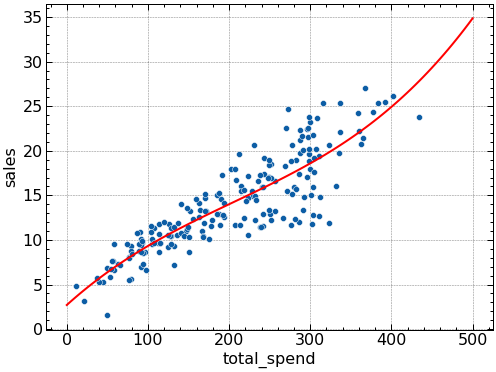

In [21]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(pot_spend, pred_sales, color = 'red')

## Scikit-Learn - Linear Regression - Train Test Split

## Part One: Data Setup and Model Training

In [22]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


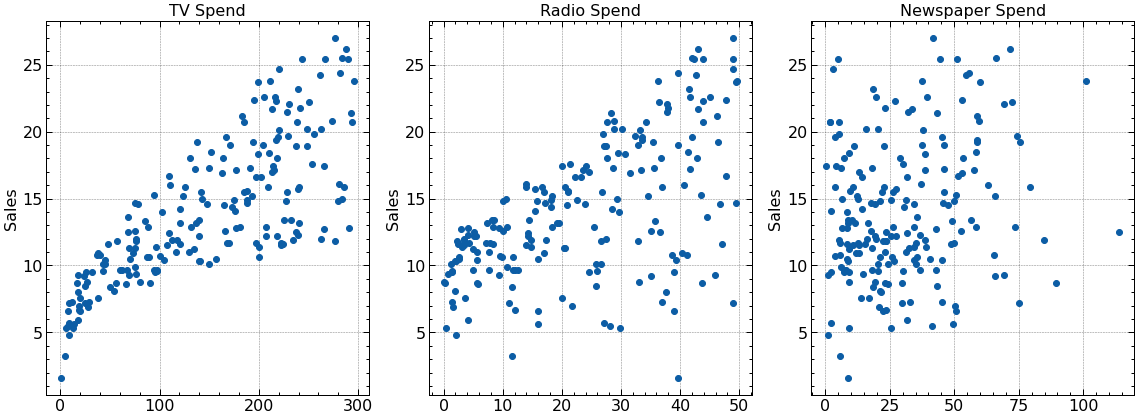

In [23]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [24]:
df = df.drop('total_spend', axis = 1)

In [25]:
X = df.drop('sales', axis = 1)

In [26]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
y = df['sales']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# help(train_test_split)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [31]:
X_train

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [32]:
y_train

154    15.6
114    14.6
118    15.9
64     18.0
165    11.9
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 134, dtype: float64

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# help(LinearRegression)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
model.predict(X_test)

## Performance Evaluation - Regression Metrics

In [ ]:
# model.predict(X_test) #y_test

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df['sales'].mean()

In [ ]:
sns.histplot(data = df, x = 'sales', bins = 20)

In [ ]:
mean_absolute_error(y_test, test_predictions)

In [ ]:
mean_squared_error(y_test, test_predictions)

In [ ]:
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
RMSE = root_mean_squared_error

In [ ]:
RMSE

## Residual Plots , Evaluating Residuals

In [ ]:
test_residuals = y_test - test_predictions

In [ ]:
test_residuals

In [ ]:
sns.scatterplot(x = y_test, y = test_residuals)  # should look random
plt.axhline(y=0, color = 'red', ls = '--')

In [ ]:
sns.displot(test_residuals, bins = 20, kde = True)

## Model Deployment 

In [ ]:
final_model = LinearRegression()

In [ ]:
final_model.fit(X,y)

In [ ]:
final_model.coef_

In [ ]:
X.head()

In [ ]:
y_hat = final_model.predict(X)

In [ ]:
ig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_sales_mode.joblib')

In [ ]:
# loaded_model = load('final_sales_model.joblib')

In [ ]:
X.shape

In [ ]:
#149 TV, 22 Radio, 12 Newspaper
# Sales?
campaign = [[149,22,12]]

In [ ]:
# loaded_model.predict(campaign)

final_model.predict(campaign)

## Polynomial Regression - Creating Polynomial Features

In [ ]:
df.head()

In [ ]:
X = df.drop('sales', axis = 1)

In [ ]:
y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
polynomial_converter.fit(X)

In [ ]:
poly_features = polynomial_converter.transform(X)

In [ ]:
poly_features.shape

In [ ]:
poly_features[0]

In [ ]:
# you can do this instead

# polynomial_converter.fit_transform(X)

## Polynomial Regression - Training and Evaluating Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state = 101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)

In [ ]:
MSE = mean_squared_error(y_test, test_predictions)

In [ ]:
RMSE = np.sqrt(MSE)

In [ ]:
MAE

In [ ]:
RMSE

In [ ]:
model.coef_

## Bias-Variance Tradeoff - Overfitting and Underfitting

In [ ]:
# just watch the video

## Polynomial Regression - Adjusting Model Parameters

In [ ]:
# create the different order poly
# split poly feat train/test
# fit on train
# store/save the RMSE for BOTH the train AND test
# Plot the results (error vs poly order)

In [ ]:
train_rmse_errors = []
test_rmse_errors = []

for d in range (1,10):
    
    poly_converter = PolynomialFeatures(degree = d, include_bias = False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.33, random_state = 101)
    
    model = LinearRegression(fit_intercept = True)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)


In [ ]:
train_rmse_errors

In [ ]:
test_rmse_errors

In [ ]:
plt.plot(range(1,6), train_rmse_errors[:5], label = 'TRAIN RMSE')
plt.plot(range(1,6), test_rmse_errors[:5], label = 'TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

In [ ]:
plt.plot(range(1,10), train_rmse_errors, label = 'TRAIN RMSE')
plt.plot(range(1,10), test_rmse_errors, label = 'TEST RMSE')
plt.ylabel('RMSE')
plt.xlabel('Degree of Polynomial')
plt.legend()

## Polynomial Regression - Model Deployment

In [ ]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [ ]:
final_model = LinearRegression()

In [ ]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'final_poly_model.joblib')

In [ ]:
dump(final_poly_converter, 'final_converter.joblib')

In [ ]:
loaded_converter = load('final_converter.joblib')

In [ ]:
loaded_model = load('final_poly_model.joblib')

In [ ]:
campaign = [[149,22,12]]

In [ ]:
transformed_data = loaded_converter.fit_transform(campaign)

In [ ]:
loaded_model.predict(transformed_data)

## Regularization for Linear Regression - Data Setup

In [ ]:
df.head()

In [ ]:
X = df.drop('sales', axis = 1)

In [ ]:
y = df['sales']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_converter = PolynomialFeatures(degree = 3, include_bias = False)

In [ ]:
poly_features = polynomial_converter.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [ ]:
X_train.shape

In [ ]:
# scale data

from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

# L2 Regularization - Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# help(Ridge)

In [ ]:
ridge_model = Ridge(alpha = 10)

In [ ]:
ridge_model.fit(X_train, y_train)

In [ ]:
test_predictions = ridge_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)

In [ ]:
MAE

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
RMSE

In [ ]:
# you can perform cross validation

from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas = (0.1,1.0,10))

In [ ]:
ridge_cv_model.fit(X_train, y_train)

In [ ]:
ridge_cv_model.alpha_

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
SCORERS.keys()

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)

In [ ]:
MAE

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
RMSE

## L1 Regularization - Lasso Regression

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lasso_cv_model = LassoCV(eps = 0.1, n_alphas = 100, cv = 5)

In [ ]:
lasso_cv_model.fit(X_train, y_train)

In [ ]:
lasso_cv_model.alpha_

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)

In [ ]:
MAE

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [ ]:
RMSE

In [ ]:
lasso_cv_model.coef_

## L1 and L2 Regularization - Elastic Net

In [37]:
from sklearn.linear_model import ElasticNetCV

In [38]:
elastic_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1], eps = 0.001, n_alphas = 100, max_iter = 1000000)

In [39]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [40]:
elastic_model.l1_ratio_

1.0

In [42]:
elastic_model.alpha_

3.052031843986958